In [1]:
import random
import pandas as pd

In [2]:
from itertools import tee

In [3]:
def generate_sequence(threshold=0.1):
    yield pd.Series([random.random(), ])
    while random.random() > 0.1:
        yield pd.Series([random.random(), ])
        
def clean_data(data):
    for _d in data:
        if _d.mean() > 0.2:
            _d = -1 * _d
        yield _d
        
def test_clean_data():
    data = (pd.Series([0.1, ]), pd.Series([0.2, ]), pd.Series([0.3, ]))
    target_data = (0.1, 0.2, -0.3)
    assert all(td == d.iloc[0] for td, d in zip(target_data, clean_data(data)))
    
test_clean_data()

def plot_data(data):
    pd.concat(data, ignore_index=True).plot()
    
def show_stats(data):
    print(pd.concat(data, ignore_index=True).describe())
    
def show_raw(data):
    print(pd.concat(data, ignore_index=True))
    
def do_analysis(analyses, data):
    for _a in analyses:
        data, _data = tee(data, 2)
        print(_a(_data))

None
0   -0.509235
1    0.031841
2   -0.947269
3   -0.531730
4   -0.587240
5   -0.645370
6   -0.242526
dtype: float64
None
count    7.000000
mean    -0.490219
std      0.310473
min     -0.947269
25%     -0.616305
50%     -0.531730
75%     -0.375881
max      0.031841
dtype: float64
None


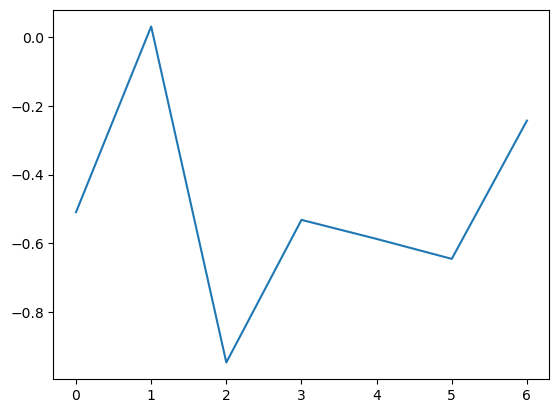

In [4]:
do_analysis(
    analyses=(plot_data, show_raw, show_stats),
    data=clean_data(generate_sequence()),
)

In [5]:
dir()

['In',
 'Out',
 '_',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i2',
 '_i3',
 '_i4',
 '_i5',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'clean_data',
 'do_analysis',
 'exit',
 'generate_sequence',
 'get_ipython',
 'open',
 'pd',
 'plot_data',
 'quit',
 'random',
 'show_raw',
 'show_stats',
 'tee',
 'test_clean_data']